In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.stats as st
from scipy.stats import linregress

In [241]:
happy_2015 = "Resources/2015.csv"
happy_2016 = "Resources/2016.csv"
happy_2017 = "Resources/2017.csv"
happy_2018 = "Resources/2018.csv"
happy_2019 = "Resources/2019.csv"

happy_2015_df = pd.read_csv(happy_2015)
happy_2016_df = pd.read_csv(happy_2016)
happy_2017_df = pd.read_csv(happy_2017)
happy_2018_df = pd.read_csv(happy_2018)
happy_2019_df = pd.read_csv(happy_2019)

In [242]:
# JOIN THE DATA

#Create joins to merge file into single dataframe, with an added column for year
happy_2015_df['Year'] = "2015"
happy_2016_df['Year'] = "2016"
happy_2017_df['Year'] = "2017"
happy_2018_df['Year'] = "2018"
happy_2019_df['Year'] = "2019"


In [243]:
happy_2018_df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')

In [244]:
# happy_2016_df.columns
# happy_2017_df.columns
# happy_2018_df.columns
# happy_2019_df.columns

In [245]:
#Remove unused columns not common across datasets
happy_15_cleaned = happy_2015_df.drop(columns=['Standard Error', 'Family', 'Dystopia Residual'])
happy_16_cleaned = happy_2016_df.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Family', 'Dystopia Residual'])
happy_17_cleaned = happy_2017_df.drop(columns=['Whisker.high','Whisker.low', 'Family', 'Dystopia.Residual'])
happy_18_cleaned = happy_2018_df.drop(columns=['Social support'])
happy_19_cleaned = happy_2019_df.drop(columns=['Social support'])

#Remove Standard Error
#drop family
#drop Dystopia Residual

In [246]:
#Rename columns to match across datasets
happy_17_cleaned = happy_17_cleaned.rename(columns={"Happiness.Rank": "Happiness Rank", "Happiness.Score": "Happiness Score", "Economy..GDP.per.Capita.": "Economy (GDP per Capita)", "Health..Life.Expectancy.": "Health (Life Expectancy)", "Trust..Government.Corruption.":"Trust (Government Corruption)", "Dystopia.Residual":"Dystopia Residual" })
happy_18_cleaned = happy_18_cleaned.rename(columns={"Overall rank": "Happiness Rank", "Score": "Happiness Score", "GDP per capita":"Economy (GDP per Capita)", "Healthy life expectancy":"Health (Life Expectancy)", "Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust (Government Corruption)", "Country or region":"Country"})
happy_19_cleaned = happy_19_cleaned.rename(columns={"Overall rank": "Happiness Rank", "Score": "Happiness Score", "GDP per capita":"Economy (GDP per Capita)", "Healthy life expectancy":"Health (Life Expectancy)", "Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust (Government Corruption)", "Country or region":"Country"})

In [247]:
happy_15_cleaned.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [248]:
#Adding Regions to datasets missing information
#2018 & 2019 only contain countries, not regions. If we aren't using regions, remove them. 
#If we are, then add a for loop to add region based on country

In [249]:
# Merge two dataframes using an outer join
# df.rename(columns={"A": "a", "B": "b", "C": "c"}, errors="raise")


happy1516 = happy_15_cleaned.append(happy_16_cleaned)
happy151617 = happy1516.append(happy_17_cleaned)
happy15161718 = happy151617.append(happy_18_cleaned)
full_data_df = happy15161718.append(happy_19_cleaned)

full_data_df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.396510,0.941430,0.665570,0.419780,0.296780,2015
1,Iceland,Western Europe,2,7.561,1.302320,0.947840,0.628770,0.141450,0.436300,2015
2,Denmark,Western Europe,3,7.527,1.325480,0.874640,0.649380,0.483570,0.341390,2015
3,Norway,Western Europe,4,7.522,1.459000,0.885210,0.669730,0.365030,0.346990,2015
4,Canada,North America,5,7.427,1.326290,0.905630,0.632970,0.329570,0.458110,2015
5,Finland,Western Europe,6,7.406,1.290250,0.889110,0.641690,0.413720,0.233510,2015
6,Netherlands,Western Europe,7,7.378,1.329440,0.892840,0.615760,0.318140,0.476100,2015
7,Sweden,Western Europe,8,7.364,1.331710,0.910870,0.659800,0.438440,0.362620,2015
8,New Zealand,Australia and New Zealand,9,7.286,1.250180,0.908370,0.639380,0.429220,0.475010,2015
9,Australia,Australia and New Zealand,10,7.284,1.333580,0.931560,0.651240,0.356370,0.435620,2015


In [250]:
#CLEAN THE DATA: Aline, Susan

#Inspect columns to see if row counts match up
#Is object type pulling in as number? If not, change to numbers
#Run a groupby for country to check for typos
#Check for and handle NaN and null fields *as appropriate*

null_values = full_data_df.isnull()
row_has_NaN = null_values.any(axis=1)
rows_with_NaN = full_data_df[row_has_NaN]

print(rows_with_NaN)

#Only NaN value is row 19 - UAE corruption. Will scrub row from corruption DF.


                      Country Region  Happiness Rank  Happiness Score  \
0                      Norway    NaN               1            7.537   
1                     Denmark    NaN               2            7.522   
2                     Iceland    NaN               3            7.504   
3                 Switzerland    NaN               4            7.494   
4                     Finland    NaN               5            7.469   
5                 Netherlands    NaN               6            7.377   
6                      Canada    NaN               7            7.316   
7                 New Zealand    NaN               8            7.314   
8                      Sweden    NaN               9            7.284   
9                   Australia    NaN              10            7.284   
10                     Israel    NaN              11            7.213   
11                 Costa Rica    NaN              12            7.079   
12                    Austria    NaN              1

In [251]:
#How many years does the country exist in the data?
full_data_df["Country"].value_counts()

Azerbaijan                  5
Peru                        5
Paraguay                    5
Syria                       5
Bosnia and Herzegovina      5
Vietnam                     5
Dominican Republic          5
Chad                        5
Chile                       5
Poland                      5
Switzerland                 5
Nepal                       5
Myanmar                     5
Burkina Faso                5
Lithuania                   5
Serbia                      5
Indonesia                   5
Albania                     5
Germany                     5
Slovakia                    5
Lebanon                     5
Singapore                   5
Egypt                       5
Norway                      5
Cameroon                    5
Costa Rica                  5
Zimbabwe                    5
Belarus                     5
Ecuador                     5
Nigeria                     5
United Kingdom              5
Kenya                       5
Turkmenistan                5
India     

In [252]:
#pulling list of country names to find name differences between years

full_data_df['Country'] = full_data_df.replace({"Trinidad & Tobago": "Trinidad and Tobago", 
                                                "Taiwan Province of China": "Taiwan",
                                                "Somaliland region": "Somaliland Region",
                                                "Hong Kong S.A.R., China": "Hong Kong",
                                                "North Cyprus": "Northern Cyprus"})
                                                


full_data_df.sort_values(by='Country')
df_unique = full_data_df['Country'].unique()
alpha = pd.DataFrame(df_unique)
alpha = alpha.sort_values(by=0, ascending = True)
pd.set_option("display.max_rows", None)
alpha

,0
152,Afghanistan
94,Albania
67,Algeria
136,Angola
29,Argentina
126,Armenia
9,Australia
12,Austria
79,Azerbaijan
48,Bahrain


In [253]:
#Rename columns to match across datasets
full_data_df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.396510,0.941430,0.665570,0.419780,0.296780,2015
1,Iceland,Western Europe,2,7.561,1.302320,0.947840,0.628770,0.141450,0.436300,2015
2,Denmark,Western Europe,3,7.527,1.325480,0.874640,0.649380,0.483570,0.341390,2015
3,Norway,Western Europe,4,7.522,1.459000,0.885210,0.669730,0.365030,0.346990,2015
4,Canada,North America,5,7.427,1.326290,0.905630,0.632970,0.329570,0.458110,2015
5,Finland,Western Europe,6,7.406,1.290250,0.889110,0.641690,0.413720,0.233510,2015
6,Netherlands,Western Europe,7,7.378,1.329440,0.892840,0.615760,0.318140,0.476100,2015
7,Sweden,Western Europe,8,7.364,1.331710,0.910870,0.659800,0.438440,0.362620,2015
8,New Zealand,Australia and New Zealand,9,7.286,1.250180,0.908370,0.639380,0.429220,0.475010,2015
9,Australia,Australia and New Zealand,10,7.284,1.333580,0.931560,0.651240,0.356370,0.435620,2015


In [254]:
# for x in Country:
#     if region = "NaN":
#         if year = "2018"

country_regions = pd.DataFrame(full_data_df.groupby('Country').first()[["Region"]].reset_index())
full_data_df = pd.merge(full_data_df.drop("Region", axis = 1), country_regions, how = "left")
#first command, grab first region, then do a merge and take first region and overwrite what is currentl there
#will create df of just country and region
full_data_df.tail()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region
777,Rwanda,152,3.334,0.359,0.614,0.555,0.411,0.217,2019,Sub-Saharan Africa
778,Tanzania,153,3.231,0.476,0.499,0.417,0.147,0.276,2019,Sub-Saharan Africa
779,Afghanistan,154,3.203,0.350,0.361,0.000,0.025,0.158,2019,Southern Asia
780,Central African Republic,155,3.083,0.026,0.105,0.225,0.035,0.235,2019,Sub-Saharan Africa
781,South Sudan,156,2.853,0.306,0.295,0.010,0.091,0.202,2019,Sub-Saharan Africa


In [255]:
#CREATE DATAFRAMES: 

# DF Set 1: Meghan, Tom
#Happiness score, country name, GDP, year -- calculate correlation coefficient and pull into df
#Generosity, country name, GDP, year -- calculate correlation coefficient and pull into df

# DF Set 2: James, Aline
#Life expectancy, corruption, freedom, year
#life expectancy, happiness, GDP, year -- chaos ensues

In [256]:
full_data_df[['Health (Life Expectancy)','Trust (Government Corruption)','Freedom']]


,Health (Life Expectancy),Trust (Government Corruption),Freedom
0,0.941430,0.419780,0.665570
1,0.947840,0.141450,0.628770
2,0.874640,0.483570,0.649380
3,0.885210,0.365030,0.669730
4,0.905630,0.329570,0.632970
5,0.889110,0.413720,0.641690
6,0.892840,0.318140,0.615760
7,0.910870,0.438440,0.659800
8,0.908370,0.429220,0.639380
9,0.931560,0.356370,0.651240


In [257]:
#life expectancy, happiness, GDP -- chaos ensues

full_data_df[['Health (Life Expectancy)','Happiness Score','Economy (GDP per Capita)']]

,Health (Life Expectancy),Happiness Score,Economy (GDP per Capita)
0,0.941430,7.587,1.396510
1,0.947840,7.561,1.302320
2,0.874640,7.527,1.325480
3,0.885210,7.522,1.459000
4,0.905630,7.427,1.326290
5,0.889110,7.406,1.290250
6,0.892840,7.378,1.329440
7,0.910870,7.364,1.331710
8,0.908370,7.286,1.250180
9,0.931560,7.284,1.333580


The r-squared is: 0.6229692274601595


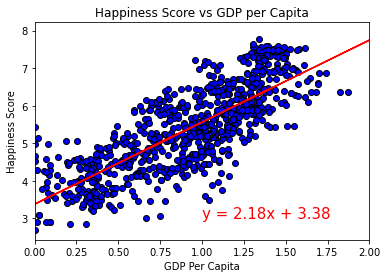

In [258]:
# Print out the r-squared value along with the plot.
x_values = full_data_df['Economy (GDP per Capita)']
y_values = full_data_df['Happiness Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Happiness Score vs GDP per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Happiness Score')
plt.xlim(0,2)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/HappinesGDP.png")
plt.show()

The r-squared is: 0.000212007646384023


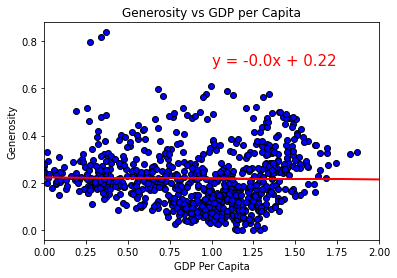

In [259]:
x_values = full_data_df['Economy (GDP per Capita)']
y_values = full_data_df['Generosity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,0.7),fontsize=15,color="red")
plt.title('Generosity vs GDP per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Generosity')
plt.xlim(0,2)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/GenerosityGDP.png")
plt.show()

The r-squared is: nan


C:\Users\chamb\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


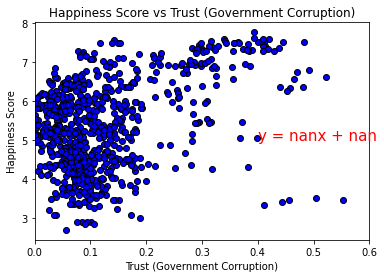

In [260]:
x_values = full_data_df['Trust (Government Corruption)']
y_values = full_data_df['Happiness Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.4,5),fontsize=15,color="red")
plt.title('Happiness Score vs Trust (Government Corruption)')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.xlim(0,0.6)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/HappinessTrust.png")
plt.show()

The r-squared is: 0.3038853857695216


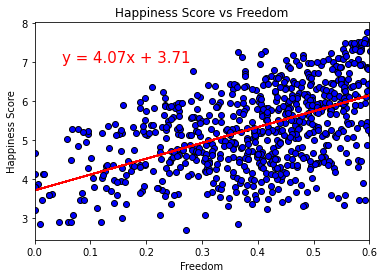

In [261]:
x_values = full_data_df['Freedom']
y_values = full_data_df['Happiness Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.05,7),fontsize=15,color="red")
plt.title('Happiness Score vs Freedom')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.xlim(0,0.6)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/HappinessFreedom.png")
plt.show()

The r-squared is: 0.11610724375203527


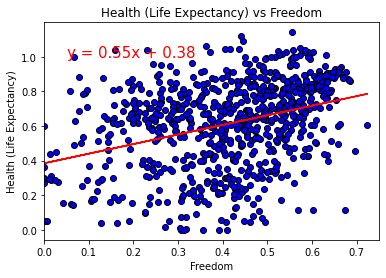

In [262]:
x_values = full_data_df['Freedom']
y_values = full_data_df['Health (Life Expectancy)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.05,1),fontsize=15,color="red")
plt.title('Health (Life Expectancy) vs Freedom')
plt.xlabel('Freedom')
plt.ylabel('Health (Life Expectancy)')
plt.xlim(0,0.75)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/HealthFreedom.png")
plt.show()

The r-squared is: nan


C:\Users\chamb\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


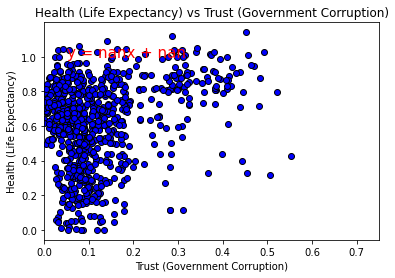

In [263]:
x_values = full_data_df['Trust (Government Corruption)']
y_values = full_data_df['Health (Life Expectancy)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.05,1),fontsize=15,color="red")
plt.title('Health (Life Expectancy) vs Trust (Government Corruption)')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Health (Life Expectancy)')
plt.xlim(0,0.75)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/HealthTrust.png")
plt.show()

In [264]:
#Bar graph/stacked bar graph of happiness score overtime by region?
###If we want to only show countries with 5 years of data, remove those without 5 years of data

regions_df = full_data_df[['Region','Happiness Score','Year']]
regions_df

,Region,Happiness Score,Year
0,Western Europe,7.587,2015
1,Western Europe,7.561,2015
2,Western Europe,7.527,2015
3,Western Europe,7.522,2015
4,North America,7.427,2015
5,Western Europe,7.406,2015
6,Western Europe,7.378,2015
7,Western Europe,7.364,2015
8,Australia and New Zealand,7.286,2015
9,Australia and New Zealand,7.284,2015


In [265]:
#bar graph

#find the average happiness score by region
# reg_bar_df = pd.DataFrame(regions_df.groupby("Region")["Happiness Score","Year"].mean()).reset_index()
# reg_bar_df = pd.DataFrame(regions_df.groupby("Year"))

# reg_bar = pd.DataFrame(regions_df.groupby(['Region','Year']).size().reset_index().groupby('Year')[[0]].max())

reg_group = pd.DataFrame((regions_df.groupby(['Region', 'Year']).agg({'Happiness Score': ['mean']})).reset_index())
happiness = reg_group['Happiness Score']
regions = reg_group['Region']
year = reg_group['Year']
# plt.bar(regions, happiness, color='r', alpha=0.5, align="center")
reg_group
# regions_df

,Region,Year,Happiness Score
,,,mean
0,Australia and New Zealand,2015,7.285000
1,Australia and New Zealand,2016,7.323500
2,Australia and New Zealand,2017,7.299000
3,Australia and New Zealand,2018,7.298000
4,Australia and New Zealand,2019,7.267500
5,Central and Eastern Europe,2015,5.332931
6,Central and Eastern Europe,2016,5.370690
7,Central and Eastern Europe,2017,5.409931
8,Central and Eastern Europe,2018,5.463966


In [266]:
total_happy = pd.DataFrame((full_data_df.groupby(['Year']).agg({'Happiness Score': ['mean']})).reset_index())
total_happy

,Year,Happiness Score
,,mean
0,2015,5.375734
1,2016,5.382185
2,2017,5.354019
3,2018,5.375917
4,2019,5.407096


In [267]:
aus_reg = reg_group[reg_group.Region=='Australia and New Zealand']
ce_reg = reg_group[reg_group.Region=='Central and Eastern Europe']
ea_reg = reg_group[reg_group.Region=='Eastern Asia']
lac_reg = reg_group[reg_group.Region=='Latin America and Caribbean']
mena_reg= reg_group[reg_group.Region=='Middle East and Northern Africa']
na_reg = reg_group[reg_group.Region=='North America']
sea_reg = reg_group[reg_group.Region=='Southeastern Asia']
sa_reg = reg_group[reg_group.Region=='Southern Asia']
ssa_reg = reg_group[reg_group.Region=='Sub-Saharan Africa']
we_reg =  reg_group[reg_group.Region=='Western Europe']


In [268]:
year_2015 = full_data_df[full_data_df.Year=='2015']
year_2016 =full_data_df[full_data_df.Year=='2016']
year_2017 = full_data_df[full_data_df.Year=='2017']
year_2018 = full_data_df[full_data_df.Year=='2018']
year_2019 = full_data_df[full_data_df.Year=='2019']

bottom_2019=year_2019.tail()
bottom_2018=year_2018.tail()
bottom_2017=year_2017.tail()
bottom_2016=year_2016.tail()
bottom_2015=year_2015.tail()

top_2019=year_2019.head()
top_2019=top_2019.head()
top_2018=year_2018.head()
top_2017=year_2017.head()
top_2016=year_2016.head()
top_2015=year_2015.head()

b19_ave = bottom_2019.mean()
b18_ave = bottom_2018.mean()
b17_ave = bottom_2017.mean()
b16_ave = bottom_2016.mean()
b15_ave = bottom_2015.mean()

t19_ave= top_2019.mean()
t18_ave= top_2018.mean()
t17_ave= top_2017.mean()
t16_ave= top_2016.mean()
t15_ave= top_2015.mean()
b19_ave

top_data={'2015': t15_ave['Happiness Score'],
         '2016': t16_ave['Happiness Score'],
         '2017': t17_ave['Happiness Score'],
         '2018': t18_ave['Happiness Score'],
         '2019': t19_ave['Happiness Score']}

bottom_data={'2015': b15_ave['Happiness Score'],
         '2016': b16_ave['Happiness Score'],
         '2017': b17_ave['Happiness Score'],
         '2018': b18_ave['Happiness Score'],
         '2019': b19_ave['Happiness Score']}

top={'Year':['2015','2016','2017','2018','2019'],
    'Happiness Score':[t19_ave['Happiness Score'],
                       t18_ave['Happiness Score'],
                       t17_ave['Happiness Score'],
                       t16_ave['Happiness Score'],
                       t15_ave['Happiness Score']]}

bottom={'Year':['2015','2016','2017','2018','2019'],
        'Happiness Score':[b19_ave['Happiness Score'],
                           b18_ave['Happiness Score'],
                           b17_ave['Happiness Score'],
                           b16_ave['Happiness Score'],
                           b15_ave['Happiness Score']]}

bottom_2019
var_happy = np.var(full_data_df['Happiness Score'], ddof = 0)
sd_happy = np.std(full_data_df['Happiness Score'], ddof = 0)
print(var_happy, sd_happy)

1.2695325477172095 1.126735349457542


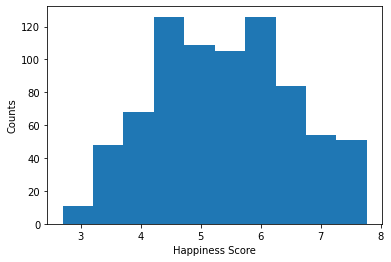

NormaltestResult(statistic=53.06994784809045, pvalue=2.9923145707945063e-12)


In [269]:
plt.hist(full_data_df['Happiness Score'])
plt.xlabel('Happiness Score')
plt.ylabel('Counts')
plt.savefig("Images/StDev.png")
plt.show()
print(st.normaltest(full_data_df['Happiness Score']))

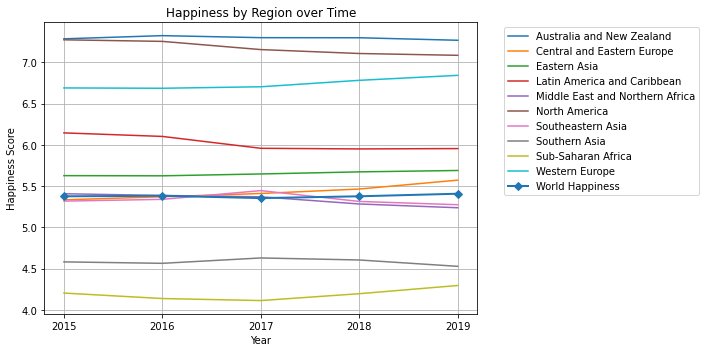

In [270]:
# reg_group = regions_df.groupby(['Region', 'Year']).agg({'Happiness Score': ['mean']})


# country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
#                         color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

plt.figure(figsize = (10,5))
plt.plot(aus_reg['Year'], aus_reg['Happiness Score'], label = "Australia and New Zealand")
plt.plot(ce_reg['Year'], ce_reg['Happiness Score'],  label = "Central and Eastern Europe")
plt.plot(ea_reg['Year'], ea_reg['Happiness Score'],  label = "Eastern Asia")
plt.plot(lac_reg['Year'], lac_reg['Happiness Score'], label = "Latin America and Caribbean")
plt.plot(mena_reg['Year'], mena_reg['Happiness Score'], label = "Middle East and Northern Africa")
plt.plot(na_reg['Year'], na_reg['Happiness Score'], label = "North America")
plt.plot(sea_reg['Year'], sea_reg['Happiness Score'], label = "Southeastern Asia")
plt.plot(sa_reg['Year'], sa_reg['Happiness Score'], label = "Southern Asia")
plt.plot(ssa_reg['Year'], ssa_reg['Happiness Score'], label = "Sub-Saharan Africa")
plt.plot(we_reg['Year'], we_reg['Happiness Score'], label = "Western Europe")
plt.plot(total_happy['Year'], total_happy['Happiness Score'],linewidth=2, marker ='D',label = "World Happiness")
# plt.legend(loc="lower right")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness by Region over Time")
# plt.xlim(3, 10)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

# plt.hlines(0, 0, 11, alpha=0.25)
# plt.ylim(3.5, 7.5)
plt.grid()

#Line graph is fairly flat
plt.savefig("Images/HappyRegions.png")
plt.show()

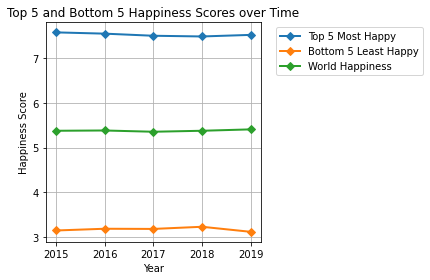

In [271]:
plt.plot(top['Year'], top['Happiness Score'],linewidth=2, marker ='D', label = "Top 5 Most Happy")
plt.plot(top['Year'], bottom['Happiness Score'],linewidth=2, marker ='D', label = "Bottom 5 Least Happy")

plt.plot(total_happy['Year'], total_happy['Happiness Score'],linewidth=2, marker ='D',label = "World Happiness")

plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Top 5 and Bottom 5 Happiness Scores over Time")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()


plt.grid()

#Line graph is fairly flat
plt.savefig("Images/MostandLeast.png")
plt.show()

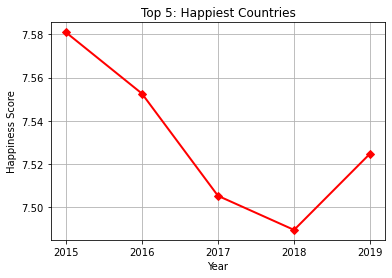

In [272]:
#PERCENTAGE CHANGE IN HAPPINESS YEAR OVER YEAR
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Top 5: Happiest Countries")
plt.grid()
plt.plot(top['Year'], top['Happiness Score'],linewidth=2, marker ='D', color='red', label = "Top 5: Most Happy")
plt.savefig("Images/Happiest.png")

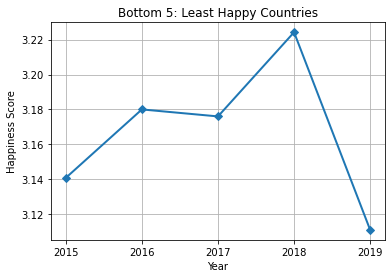

In [273]:
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Bottom 5: Least Happy Countries")
plt.grid()
plt.plot(bottom['Year'], bottom['Happiness Score'],linewidth=2, marker ='D', label = "Bottom 5: Least Happy")
plt.savefig("Images/Saddest.png")

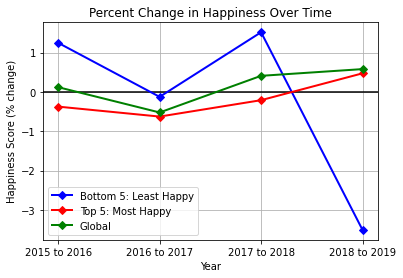

In [274]:
#[ercent change worldwide
happy15=((total_happy.loc[total_happy['Year'] == '2015', 'Happiness Score'].iloc[0]))
happy16=((total_happy.loc[total_happy['Year'] == '2016', 'Happiness Score'].iloc[0]))
happy17=((total_happy.loc[total_happy['Year'] == '2017', 'Happiness Score'].iloc[0]))
happy18=((total_happy.loc[total_happy['Year'] == '2018', 'Happiness Score'].iloc[0]))
happy19=((total_happy.loc[total_happy['Year'] == '2019', 'Happiness Score'].iloc[0]))

change1516 = ((happy16-happy15)/happy15)*100
change1617 = ((happy17-happy16)/happy16)*100
change1718 = ((happy18-happy17)/happy17)*100
change1819 = ((happy19-happy18)/happy18)*100

percentage_change={'Year':['2015 to 2016','2016 to 2017','2017 to 2018','2018 to 2019'],
                'Change':[change1516,change1617,change1718,change1819]}

#percent change bottom 5
bottom_df=pd.DataFrame(bottom)
bottom15pc=((bottom_df.loc[bottom_df['Year'] == '2015', 'Happiness Score'].iloc[0]))
bottom16pc=((bottom_df.loc[bottom_df['Year'] == '2016', 'Happiness Score'].iloc[0]))
bottom17pc=((bottom_df.loc[bottom_df['Year'] == '2017', 'Happiness Score'].iloc[0]))
bottom18pc=((bottom_df.loc[bottom_df['Year'] == '2018', 'Happiness Score'].iloc[0]))
bottom19pc=((bottom_df.loc[bottom_df['Year'] == '2019', 'Happiness Score'].iloc[0]))

bchange1516 = ((bottom16pc-bottom15pc)/bottom15pc)*100
bchange1617 = ((bottom17pc-bottom16pc)/bottom16pc)*100
bchange1718 = ((bottom18pc-bottom17pc)/bottom17pc)*100
bchange1819 = ((bottom19pc-bottom18pc)/bottom18pc)*100

bottom_change={'Year':['2015 to 2016','2016 to 2017','2017 to 2018','2018 to 2019'],
                'Change':[bchange1516,bchange1617,bchange1718,bchange1819]}




#percent change top 5
top_df=pd.DataFrame(top)
top15pc=((top_df.loc[bottom_df['Year'] == '2015', 'Happiness Score'].iloc[0]))
top16pc=((top_df.loc[bottom_df['Year'] == '2016', 'Happiness Score'].iloc[0]))
top17pc=((top_df.loc[bottom_df['Year'] == '2017', 'Happiness Score'].iloc[0]))
top18pc=((top_df.loc[bottom_df['Year'] == '2018', 'Happiness Score'].iloc[0]))
top19pc=((top_df.loc[bottom_df['Year'] == '2019', 'Happiness Score'].iloc[0]))

tchange1516 = ((top16pc-top15pc)/top15pc)*100
tchange1617 = ((top17pc-top16pc)/top16pc)*100
tchange1718 = ((top18pc-top17pc)/top17pc)*100
tchange1819 = ((top19pc-top18pc)/top18pc)*100

top_change={'Year':['2015 to 2016','2016 to 2017','2017 to 2018','2018 to 2019'],
                'Change':[tchange1516,tchange1617,tchange1718,tchange1819]}


plt.xlabel("Year")
plt.ylabel("Happiness Score (% change)")
plt.title("Percent Change in Happiness Over Time")

plt.grid()
plt.hlines(0, -1, 10, alpha=1)

plt.plot(bottom_change['Year'], bottom_change['Change'],linewidth=2, marker ='D', color='blue', label = "Bottom 5: Least Happy")
plt.plot(top_change['Year'], top_change['Change'],linewidth=2, marker ='D', color='red', label = "Top 5: Most Happy")
plt.plot(percentage_change['Year'], percentage_change['Change'],linewidth=2, marker ='D', color='green', label = "Global")
plt.legend(loc='lower left')

plt.savefig("Images/Change.png")